# PCA Paths Demo

## Set-up

### Load modules

In [1]:
import os # module for interacting with files and folders
from audio_processing import *
from audio_display import *
from array_manipulation import *
from pca_paths import *
from feature_normalize import *

### Load Audio Files

In [2]:
from load_audio import *

paths = [r'sound/American-English/Narrative',
        r'sound/American-English/Consonants',
        r'sound/American-English/Vowels',
        r'sound/Non-speech']

out_path = 'sound/out/'

fns,audio_data = load_audio(paths_list=paths, pad=0.1)

narrative_fns,consonants_fns,vowels_fns,nonspeech_fns = fns
narrative_data,consonants_data,vowels_data,nonspeech_data = audio_data

narr_scaler = get_scaler(narrative_fns,mfcc_n=36,scaler_type='maxabs')

In [3]:
narr = get_narr(narrative_fns,mfcc_n=36,pad=0)
training_X = np.transpose(narr)

## PCA Paths

## Training

In [4]:
pca_test = PCA(n_components=2).fit(training_X)
print(f'Explained variance ratio: \n{pca_test.explained_variance_ratio_}')

Explained variance ratio: 
[0.5346443  0.20649482]


Explained variance ratio: 
[0.534644   0.20649473]


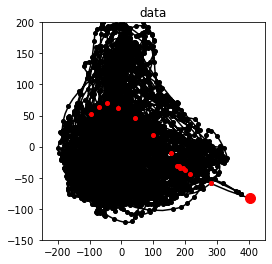

In [5]:
pca1 = PCA(n_components=2).fit(training_X)
print(f'Explained variance ratio: \n{pca1.explained_variance_ratio_}')
test_pca = pca1.transform(training_X)
test_pca = np.transpose(test_pca)
plot_2d_path(test_pca)

Explained variance ratio: 
[0.22068651 0.11891402]


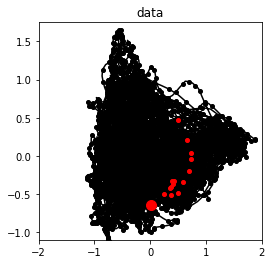

In [6]:
normed_narr = norm_array_hor(narr,narr_scaler)
normed_training_X = np.transpose(normed_narr)
pca2 = PCA(n_components=2).fit(normed_training_X)
print(f'Explained variance ratio: \n{pca2.explained_variance_ratio_}')
test_pca = pca2.transform(normed_training_X)
test_pca = np.transpose(test_pca)
plot_2d_path(test_pca,x_bounds=(-2,2),y_bounds=(-1.1,1.75))

## Testing

### Raw MFCCs

In [1]:
path_test_fns = vowels_fns[0:4]+consonants_fns[:3]#+nonspeech_fns
for clip_fn in path_test_fns:
  name = clip_fn.split("/")[-1].split(".")[0].title()
  clip_data = process_audio(clip_fn,n_mfcc_list=[12],pad = 0)
  fourier = clip_data["fourier"]
  sr = clip_data["sr"]
  clip_frames = np.transpose(clip_data["mfcc"]["12"])
  clip_pca = pca1.transform(clip_frames)
  clip_pca = np.transpose(clip_pca)
  plot_2d_path(clip_pca,title=name,size=(6,6))
  plot_spectrogram(fourier,sr,title=name)

NameError: name 'vowels_fns' is not defined

### Normed MFCCs

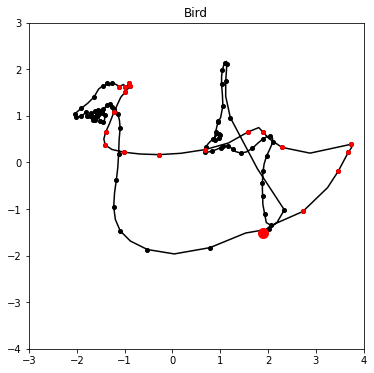

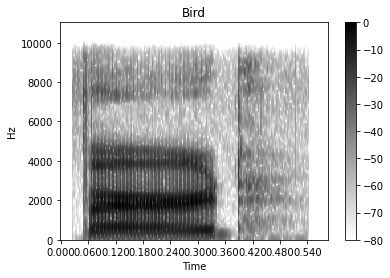

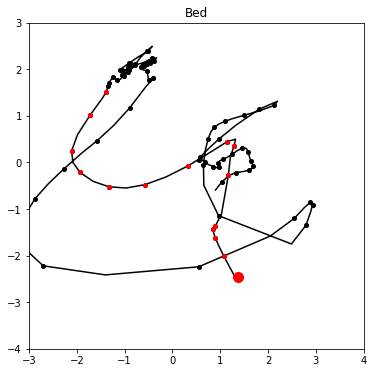

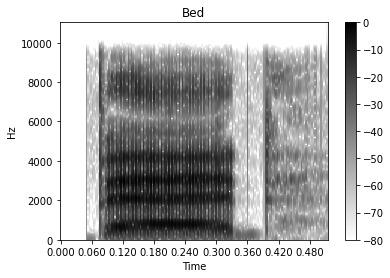

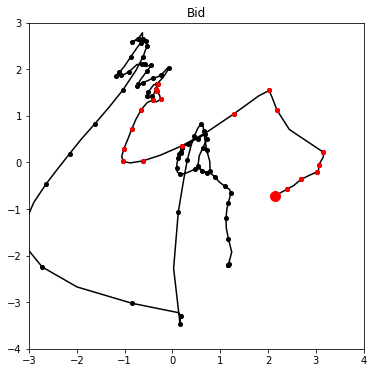

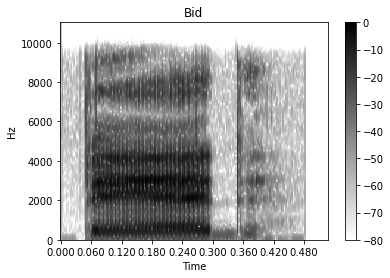

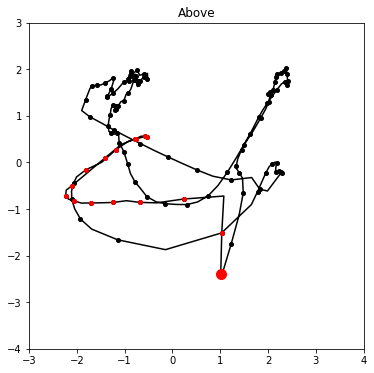

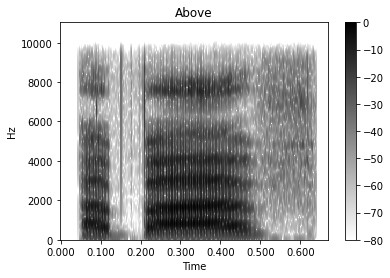

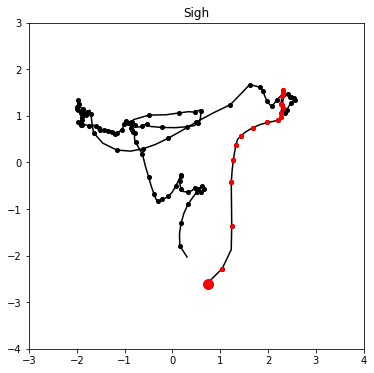

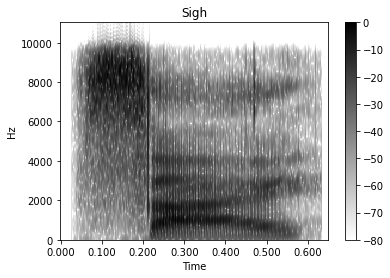

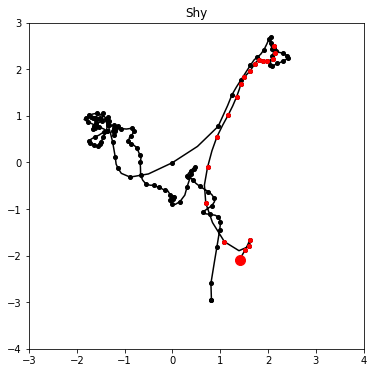

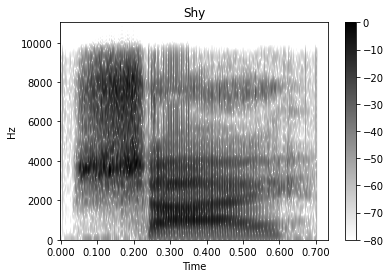

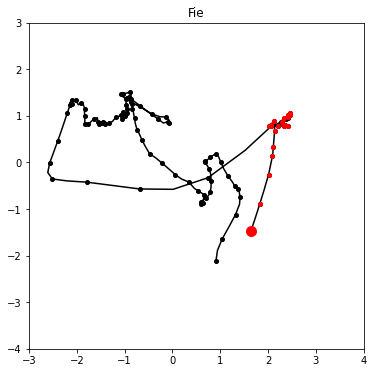

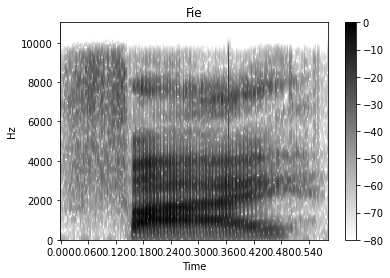

In [ ]:
path_test_fns = vowels_fns[0:4]+consonants_fns[:3]#+nonspeech_fns
for clip_fn in path_test_fns:
  name = clip_fn.split("/")[-1].split(".")[0].title()
  clip_data = process_audio(clip_fn,n_mfcc_list=[12],pad = 0)
  fourier = clip_data["fourier"]
  sr = clip_data["sr"]
  normed_mfcc = norm_array_hor(clip_data["mfcc"]["12"],narr_scaler)
  clip_frames = np.transpose(normed_mfcc)
  clip_pca = pca2.transform(clip_frames)
  clip_pca = np.transpose(clip_pca)
  plot_2d_path(clip_pca,title=name,size=(6,6),x_bounds=(-3,4),y_bounds=(-4,3))
  plot_spectrogram(fourier,sr,title=name)